In [1]:
#Parsing

%matplotlib inline
import tensorflow as tf

from IPython.display import SVG
from hailo_sdk_client import ClientRunner

model_name = 'mnist'
model_path = 'mnist_saved_model/saved_model.pb'

# Parsing the model to Hailo format
#ClientRunner - Main API for parsing
runner = ClientRunner(hw_arch='hailo8')


In [2]:
#Parses a TF model given a SavedModel file.
#The HN model is a JSON representation of the graph structure that is deployed to
#the Hailo hardware. The weights are also returned as a NumPy NPZ file.
hn, npz = runner.translate_tf_model(model_path, model_name) 


INFO:tensorflow:Restoring parameters from /tmp/tmpdicdi4wq/variables.ckpt
[info] Translation completed on TensorFlow 2.x model mnist


2023-04-10 16:27:41.994890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 16:27:41.997139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-10 16:27:41.997152: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-10 16:27:41.997164: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-FNN0JLC): /proc/driver/nvidia/version does not exist
2023-04-10 16:27:42.044514: I tensorflow/co

[info] Initialized runner for mnist


In [3]:
#The HAR copmressed file includes HN and NPZ files
hailo_model_har_name = '{}_hailo_model.har'.format(model_name)
runner.save_har(hailo_model_har_name)


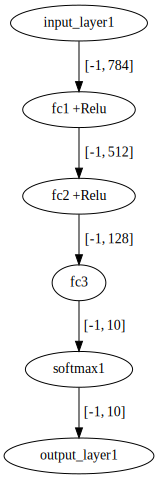

In [4]:
#The hailo visualizer saves an SVG file with the layers of the model
!hailo visualizer {hailo_model_har_name} --no-browser
SVG('mnist.svg')

In [5]:
#The profiler tool uses the HAR file and profiles the expected performance of the model on hardware.
!hailo profiler --mode pre_placement {hailo_model_har_name}

2023-04-10 16:27:59.854733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-10 16:27:59.854769: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-10 16:27:59.854783: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-FNN0JLC): /proc/driver/nvidia/version does not exist
[warning] Reducing optimization level to 0 (the accuracy won't be optimized and compression won't be used) because there's no available GPU
[info] Starting Hailo context-partitioner flow
[info] Resources optimization guidelines: Strategy -> GREEDY Objective -> MAX_FPS
[info] Using Single-context flow
[info] Resources optimization params: max_control_utilization=75%, max_compute_util

Traceback (most recent call last):
  File "/local/workspace/hailo_virtualenv/bin/hailo", line 8, in <module>
    sys.exit(main())
  File "/local/workspace/hailo_virtualenv/lib/python3.8/site-packages/hailo_sdk_client/tools/cmd_utils/main.py", line 32, in main
    ret_val = client_command_runner.run()
  File "/local/workspace/hailo_virtualenv/lib/python3.8/site-packages/hailo_platform/tools/hailocli/main.py", line 58, in run
    return self._run(argv)
  File "/local/workspace/hailo_virtualenv/lib/python3.8/site-packages/hailo_platform/tools/hailocli/main.py", line 97, in _run
    return args.func(args)
  File "/local/workspace/hailo_virtualenv/lib/python3.8/site-packages/hailo_sdk_client/tools/profiler/profiler.py", line 134, in run
    profile(args.model_path, args.hw_arch, args.fps, args.out_path, args.mode, args.quantized_params,
  File "/local/workspace/hailo_virtualenv/lib/python3.8/site-packages/hailo_sdk_client/tools/profiler/profiler.py", line 67, in profile
    stats, csv_data,